<a href="https://colab.research.google.com/github/hwanid/DevSet4/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data_train = np.genfromtxt('data_train.csv', delimiter=',', dtype=np.str)
data_test = np.genfromtxt('data_test.csv', delimiter=',', dtype=np.str)

data_train = np.char.strip(data_train,'"').astype(np.float128)
data_test = np.char.strip(data_test,'"').astype(np.float128)

In [0]:
x_train = data_train[:, :3]
y_train = data_train[:, 3]

x_test = data_test[:, :3]
y_test = data_test[:, 3]

n_samples = len(data_train)

x_train = np.c_[np.ones((n_samples,1)), x_train]
x_test = np.c_[np.ones((n_samples,1)), x_test]

y_train = y_train.reshape(n_samples, 1)
y_test = y_test.reshape(n_samples, 1)

In [0]:
m = n_samples
learning_rate = 0.00001

theta = np.array([[-1],[-1],[-1],[-1]])
loss_train = []
loss_test = []
theta0 = []
theta1 = []
theta2 = []
theta3 = []
for i in range(30000):
  theta0.append(theta[0][0])
  theta1.append(theta[1][0])
  theta2.append(theta[2][0])
  theta3.append(theta[3][0])

  gradients = 1/m * x_train.T.dot(x_train.dot(theta) - y_train)
  theta_b = theta
  theta = theta - learning_rate*gradients
  
  loss_t = np.sum(((x_train.dot(theta) - y_train)**2), axis=0) / (2*m)
  loss_train.append(loss_t[0])

  loss_t = np.sum(((x_test.dot(theta) - y_test)**2), axis=0) / (2*m)
  loss_test.append(loss_t[0])
  if abs(theta - theta_b).sum() == 0:
    break

learning_rate = 0.00002
for i in range(10000):
  theta0.append(theta[0][0])
  theta1.append(theta[1][0])
  theta2.append(theta[2][0])
  theta3.append(theta[3][0])

  gradients = 1/m * x_train.T.dot(x_train.dot(theta) - y_train)
  theta_b = theta
  theta = theta - learning_rate*gradients
  
  loss_t = np.sum(((x_train.dot(theta) - y_train)**2), axis=0) / (2*m)
  loss_train.append(loss_t[0])

  loss_t = np.sum(((x_test.dot(theta) - y_test)**2), axis=0) / (2*m)
  loss_test.append(loss_t[0])
  if abs(theta - theta_b).sum() < 0.000001:
    break

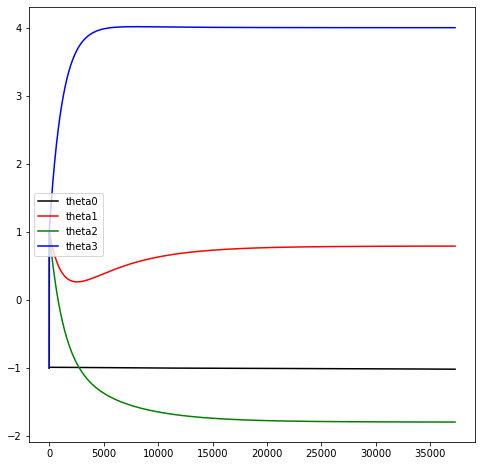

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(theta0, label='theta0', c='black')
plt.plot(theta1, label='theta1', c='r')
plt.plot(theta2, label='theta2', c='g')
plt.plot(theta3, label='theta3', c='b')
plt.legend()
plt.show()

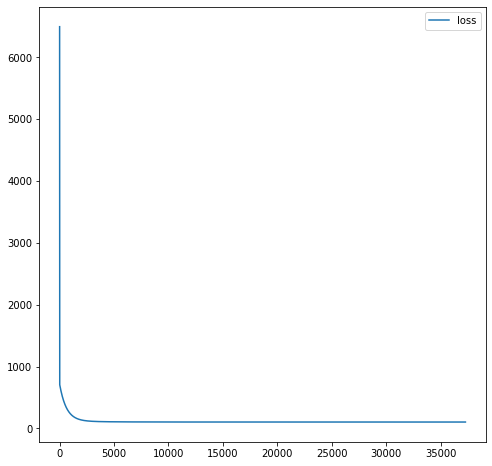

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(loss_train, label='loss')
plt.legend()
plt.show()